# Tri à bulles

# Algorithme de base

On considère une liste d'entiers `lst`.
- on parcourt la liste du premier élément à l'avant-dernier : si cet élément est plus grand que le suivant, on les échange;
- tandt qu'on a fait au moins un échange, on recommence.

Programme la fonction `tri_bulles`

In [7]:
def tri_bulles(lst : list) -> None:
    n = len(lst)
    echange = True
    while echange:
        echange = False
        for i in range(n-1):
            if lst[i] > lst[i+1]:
                lst[i], lst[i+1] = lst[i+1], lst[i]
                echange = True

Exécute la cellule de test suivante : elle ne doit pas produire d'erreur.

In [8]:
tri_bulles([3,2,1])
print("Pas d'erreur.")

Pas d'erreur.


Exécute la cellule de test suivante pour vérifier que `place` fait bien ce qu'il faut.

In [9]:
from random import randint

L1 = [randint(1,1000) for _ in range(10)]
L2 = L1[:]
L2.sort()
tri_bulles(L1)
if L1==L2:
    print("Tout est OK, tu peux continuer.")
else:
    print("Il y a un problème dans la fonction.")


Tout est OK, tu peux continuer.


# Complexité

tu vas maintenant rajouter une variable globale `opel` dans les 2 fonctions précédentes, que tu vas recopier ci dessous.
Tu l'augmenteras de 1 à chaque accès à `lst` en lecture/écriture, de 2 s'il y a un échange.

**Ce procédé nous permet de mesurer le nombre d'opels *réel* pour trier une liste donnée, pas la complexité pire cas.**

Commençons par la fonction `place`

In [10]:
nb_opel = 0
def tri_bulles(lst : list) -> None:
    global nb_opel
    n = len(lst)
    echange = True
    while echange:
        echange = False
        for i in range(n-1):
            nb_opel += 2
            if lst[i] > lst[i+1]:
                nb_opel += 2
                lst[i], lst[i+1] = lst[i+1], lst[i]
                echange = True

Exécute la cellule de tests suivante.

In [11]:
nb_opel = 0
L = [21,58,231,426,551,621,3546,32135,116851,2223213,2]
tri_bulles(L)
print(nb_opel)


240


## Illustration des résultats

Exécute la cellule suivante.

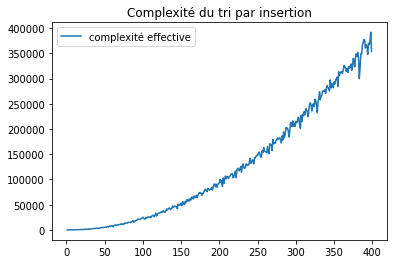

In [13]:
import matplotlib.pyplot as plt

X = []
Y = []
Z = []
for i in range(1,400):
    L = [randint(1,10000) for _ in range(i)]
    nb_opel = 0
    tri_bulles(L)
    X.append(i)
    Y.append(nb_opel)

plt.plot(X,Y,label = "complexité effective")
plt.title("Complexité du tri par insertion")
plt.legend()
plt.show()

Comme on peut le voir, la complexité réelle semble bien de l'ordre de $n^2$.
On peut essayer de déterminer "à la main" le coefficient $a$ tel que la courbe bleu se rapproche le plus de la courbe de la fonction définie sur $\mathbb{N}^*$ par $$n\mapsto an^2$$
Il suffit d'essayer successivement des valeurs de $a$ :

Entrer une valeur de a : 2.4


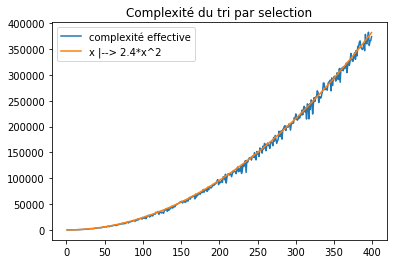

In [15]:
X = []
Y = []
Z = []
a = float(input("Entrer une valeur de a : "))
for i in range(1,400):
    L = [randint(1,10000) for _ in range(i)]
    nb_opel = 0
    tri_bulles(L)
    X.append(i)
    Y.append(nb_opel)
    Z.append(a*i**2)
plt.plot(X,Y,label = "complexité effective")
plt.plot(X,Z,label = "x |--> "+str(a)+"*x^2")
plt.title("Complexité du tri par selection")
plt.legend()
plt.show()

Si on se réfère aux résultats que tu as trouvés, pour une liste de taille 100000, combien faut-il d'opels environ pour la trier avec le tri par selection ?

In [16]:
2.4*100000**2

24000000000.0

## Amélioration de l'algorithme

Lorsqu'on considère une liste `lst` et qu'on la trie avec le tri à bulles :
- à la fin du premier parcourt de `lst`, que peut-on dire de son dernier élément ?
- est-il nécessaire de parcourir `lst` en entier la deuxième fois ?
- que dire des deux derniers éléments de `lst` au bout du deuxième parcours ?


En prenant en compte les considérations précédentes, écris une nouvelle fonction `tri_bulles2`, qui elle aussi comptabilise les `nb_opel`, et qui va être plus performante que `tri_bulles`.

In [17]:
nb_opel = 0
def tri_bulles2(lst : list) -> None:
    global nb_opel
    n = len(lst)
    echange = True
    p = 0
    while p<=n-1 and echange:
        echange = False
        for i in range(n-1-p):
            nb_opel += 2
            if lst[i] > lst[i+1]:
                nb_opel += 2
                lst[i], lst[i+1] = lst[i+1], lst[i]
                echange = True
        p += 1

Exécute la cellule de test suivante : elle ne doit pas produire d'erreur.

In [18]:
tri_bulles2([3,2,1])
print("Pas d'erreur.")

Pas d'erreur.


Exécute la cellule de test suivante pour vérifier que `place` fait bien ce qu'il faut.

In [19]:
from random import randint

L1 = [randint(1,1000) for _ in range(10)]
L2 = L1[:]
L2.sort()
tri_bulles(L1)
if L1==L2:
    print("Tout est OK, tu peux continuer.")
else:
    print("Il y a un problème dans la fonction.")


Tout est OK, tu peux continuer.


## Comparaison des complexités

Exécute la cellule suivant pour une interprétation graphique des résultats.

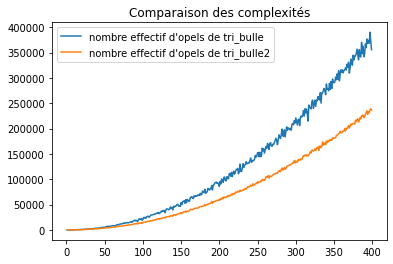

In [21]:
X = []
Y = []
Z = []
for i in range(1,400):
    L = [randint(1,10000) for _ in range(i)]
    Lc = L[:]
    nb_opel = 0
    tri_bulles(L)
    X.append(i)
    Y.append(nb_opel)
    nb_opel = 0
    tri_bulles2(Lc)
    Z.append(nb_opel)
plt.plot(X,Y,label = "nombre effectif d'opels de tri_bulle")
plt.plot(X,Z,label = "nombre effectif d'opels de tri_bulle2")
plt.title("Comparaison des complexités")
plt.legend()
plt.show()

Comme on peut le voir, la complexité de `tri_bulles2` semble bien de l'ordre de $n^2$, et inférieure à celle de `tri_bulle`.
On peut essayer de déterminer "à la main" le coefficient $a$ tel que la courbe bleue se rapproche le plus de la courbe de la fonction définie sur $\mathbb{N}^*$ par $$n\mapsto an^2$$
Il suffit d'essayer successivement des valeurs de $a$ :

Entrer une valeur de a : 1.5


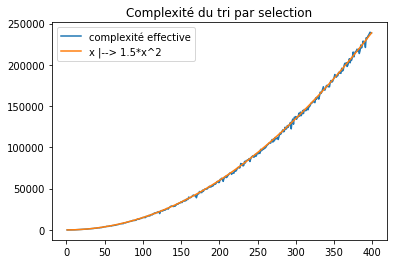

In [22]:
X = []
Y = []
Z = []
a = float(input("Entrer une valeur de a : "))
for i in range(1,400):
    L = [randint(1,10000) for _ in range(i)]
    nb_opel = 0
    tri_bulles2(L)
    X.append(i)
    Y.append(nb_opel)
    Z.append(a*i**2)
plt.plot(X,Y,label = "complexité effective")
plt.plot(X,Z,label = "x |--> "+str(a)+"*x^2")
plt.title("Complexité du tri par selection")
plt.legend()
plt.show()